Dataset Columns: Index(['id', 'thickness', 'size', 'shape', 'adhesion', 'single', 'nuclei',
       'chromatin', 'nucleoli', 'mitosis', 'class'],
      dtype='object')
Dataset Head:
         id  thickness  size  shape  adhesion  single  nuclei  chromatin  \
0  1000025          5     1      1         1       2     1.0          3   
1  1002945          5     4      4         5       7    10.0          3   
2  1015425          3     1      1         1       2     2.0          3   
3  1016277          6     8      8         1       3     4.0          3   
4  1017023          4     1      1         3       2     1.0          3   

   nucleoli  mitosis  class  
0         1        1      0  
1         2        1      0  
2         1        1      0  
3         7        1      0  
4         1        1      0  
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        92
           1       0.92      0.94      

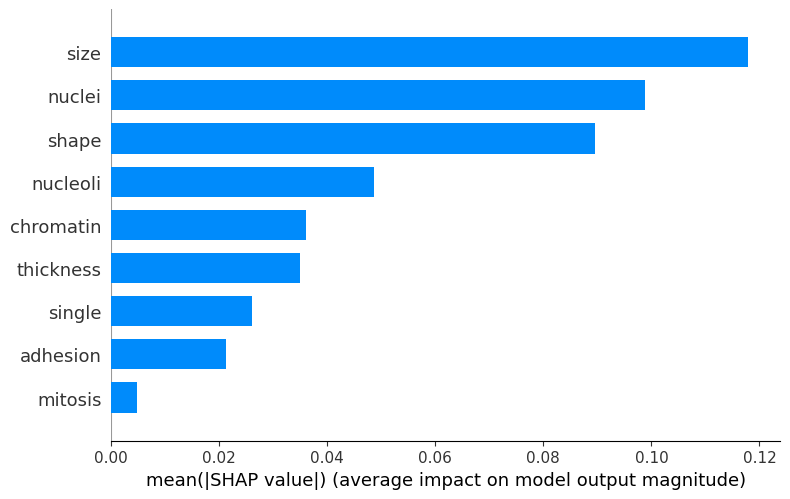

Generating SHAP force plot for a sample prediction...


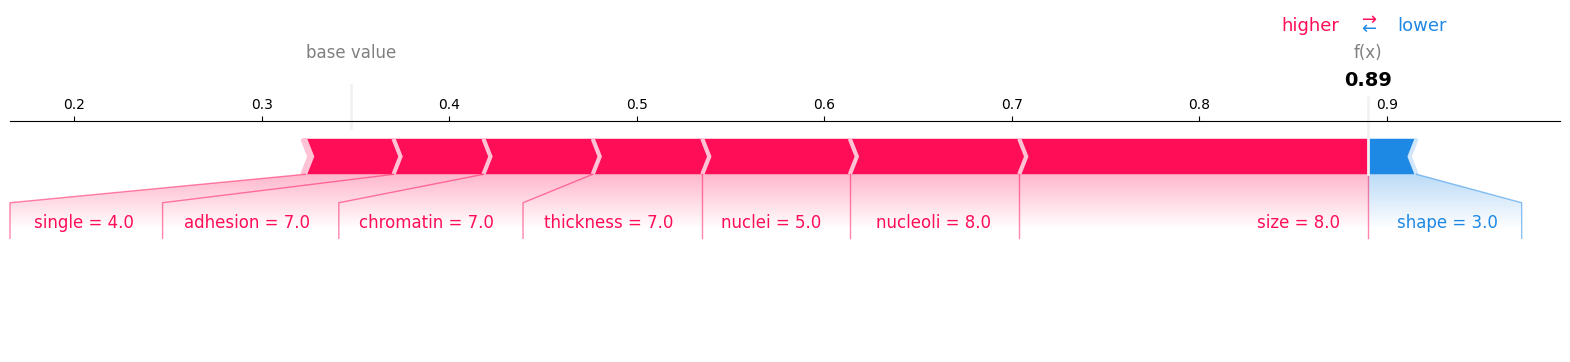

Generating SHAP dependence plot...


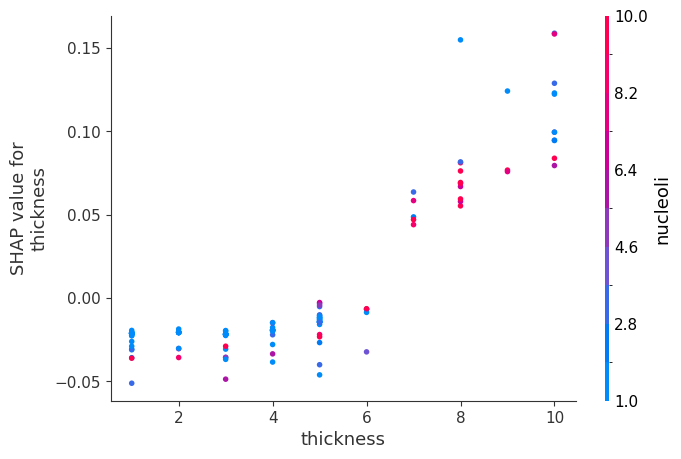

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import shap
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/kaggle/input/wisconsin-breast-cancer-cytology-features/wisconsin_breast_cancer.csv'
data = pd.read_csv(data_path)

# Display dataset info
print("Dataset Columns:", data.columns)
print("Dataset Head:\n", data.head())

# Preprocessing
# Dropping the 'id' column as it's irrelevant
X = data.drop(columns=['id', 'class'], errors='ignore')
Y = data['class']

# Handling missing values (if any)
X = X.fillna(X.median())

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Training a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, Y_train)

# Model evaluation
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Explainable AI using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizing feature importance
print("Generating SHAP summary plot...")
shap.summary_plot(shap_values[1], X_test, plot_type="bar")
plt.show()

# Visualizing individual prediction explanation
sample_index = 0  # Change this index to analyze other samples
print("Generating SHAP force plot for a sample prediction...")
shap.force_plot(explainer.expected_value[1], shap_values[1][sample_index], X_test.iloc[sample_index], matplotlib=True)

# Dependence plot for a specific feature (e.g., feature at index 0)
print("Generating SHAP dependence plot...")
shap.dependence_plot(0, shap_values[1], X_test)
